In [2]:
! ls csv_files/

marketing_customer_analysis.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# 1) Use the same jupyter file from the last lab, `Customer Analysis Round 3`
data = pd.read_csv("../../data_files/csv_files/marketing_customer_analysis.csv")
data.columns = [i.lower().replace(" ", "_") for i in  data.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

<AxesSubplot:ylabel='count'>

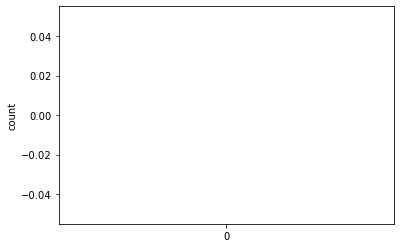

In [5]:
# 2) Show DataFrame info
data.info()

In [6]:
# 2) Describe DataFrame.
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


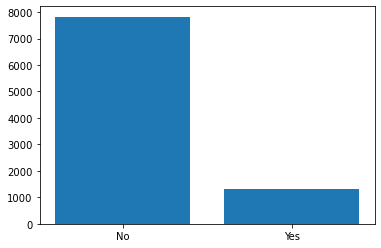

In [5]:
# 3) show a plot of the total number of responses.
answers = list(data.response.value_counts().index)
counts = list(data.response.value_counts())
plt.bar(x=answers,height=counts)
plt.show()

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

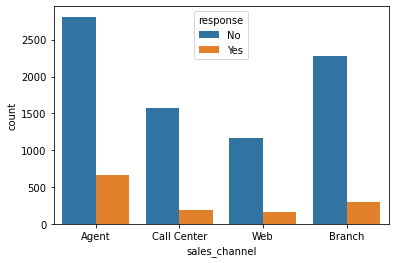

In [14]:
#4 Show a plot of the response rate by the sales channel.
sns.countplot(x="sales_channel",data=data, hue=data.response)

In [7]:
#5 Show a plot of the response rate by the total claim amount.
#sns.countplot(x="total_claim_amount",data=data, hue="response")
data.value_counts(data.total_claim_amount)
## Check the amount of values that are different and how many are there

total_claim_amount
316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
217.926320       1
217.554695       1
217.472776       1
217.188864       1
2893.239678      1
Length: 5106, dtype: int64

In [8]:
data.total_claim_amount.describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

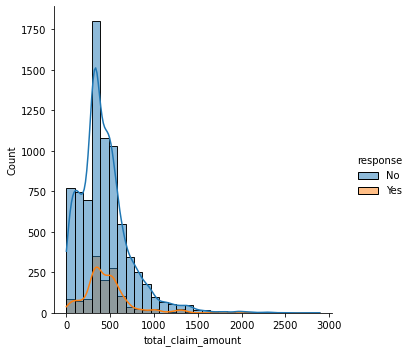

In [25]:
data.total_claim_amount.nunique()
sns.displot(x="total_claim_amount", data=data, bins=30, hue="response",
           kde=True)
plt.show()

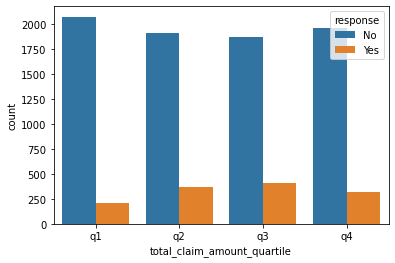

In [26]:
data1 = data.sort_values("total_claim_amount")
column = "total_claim_amount"
p25 = data1[column].describe()['25%']
p50 = data1[column].describe()['50%']
p75 = data1[column].describe()['75%']

def mapping_function(x):
    if x < p25:
        return 'q1'
    elif x < p50:
        return 'q2'
    elif x < p75:
        return 'q3'
    else: 
        return 'q4'
    
data1["total_claim_amount_quartile"] = data1.total_claim_amount.apply(mapping_function)

sns.countplot(x="total_claim_amount_quartile",data=data1, hue="response")
plt.show()

In [10]:
data.income.describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

<AxesSubplot:xlabel='income_quartile', ylabel='count'>

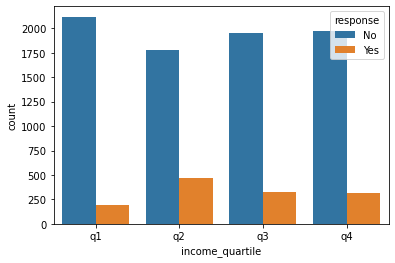

In [13]:
#6 Show a plot of the response rate by income.

sorted_data = data.sort_values("income")
column = "income"
p25 = data1[column].describe()['25%']
p50 = data1[column].describe()['50%']
p75 = data1[column].describe()['75%']

def mapping_function(x):
    if x <= p25:
        return 'q1'
    elif x < p50:
        return 'q2'
    elif x < p75:
        return 'q3'
    else: 
        return 'q4'
    
sorted_data["income_quartile"] = sorted_data.income.apply(mapping_function)

sns.countplot(x="income_quartile",
              data=sorted_data,
              hue="response")